In [33]:
#importing Libraries

import numpy as np 
np.random.seed(42)  ## So that output will be same
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline  ## our plot lies on the same notebook

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

#for warning
from warnings import filterwarnings
filterwarnings("ignore")  ## To remove any kind of warning

UsageError: unrecognized arguments: ## our plot lies on the same notebook


<b>Load the dataset</b>

In [2]:
data = pd.read_csv('diabetes.csv')

<b>EDA on Dataset</b>

In [3]:
print(data.shape) # Return the shape of data
print(data.ndim)  # Return the n dimensions of data
print(data.size)  # Return the size of data
print(data.isna().sum())  #Returns the sum of all null values
print(data.info())  # Gives concise summary of a Dataframe

(768, 9)
2
6912
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    

<b>Let’s Visualise the Some columns and compare them</b>

([<matplotlib.axis.XTick at 0x15fa6170bf0>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

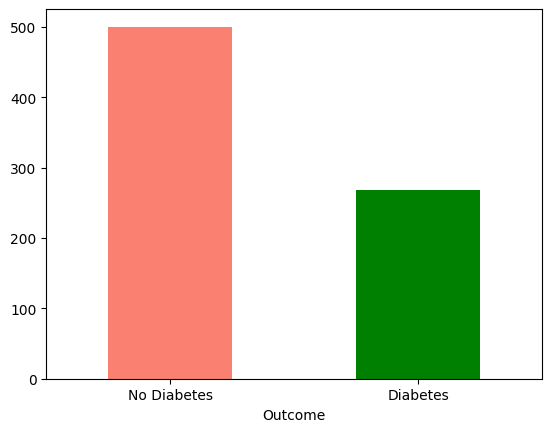

In [5]:
data["Outcome"].value_counts().plot(kind="bar", color=["salmon", "green"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'), rotation=0)

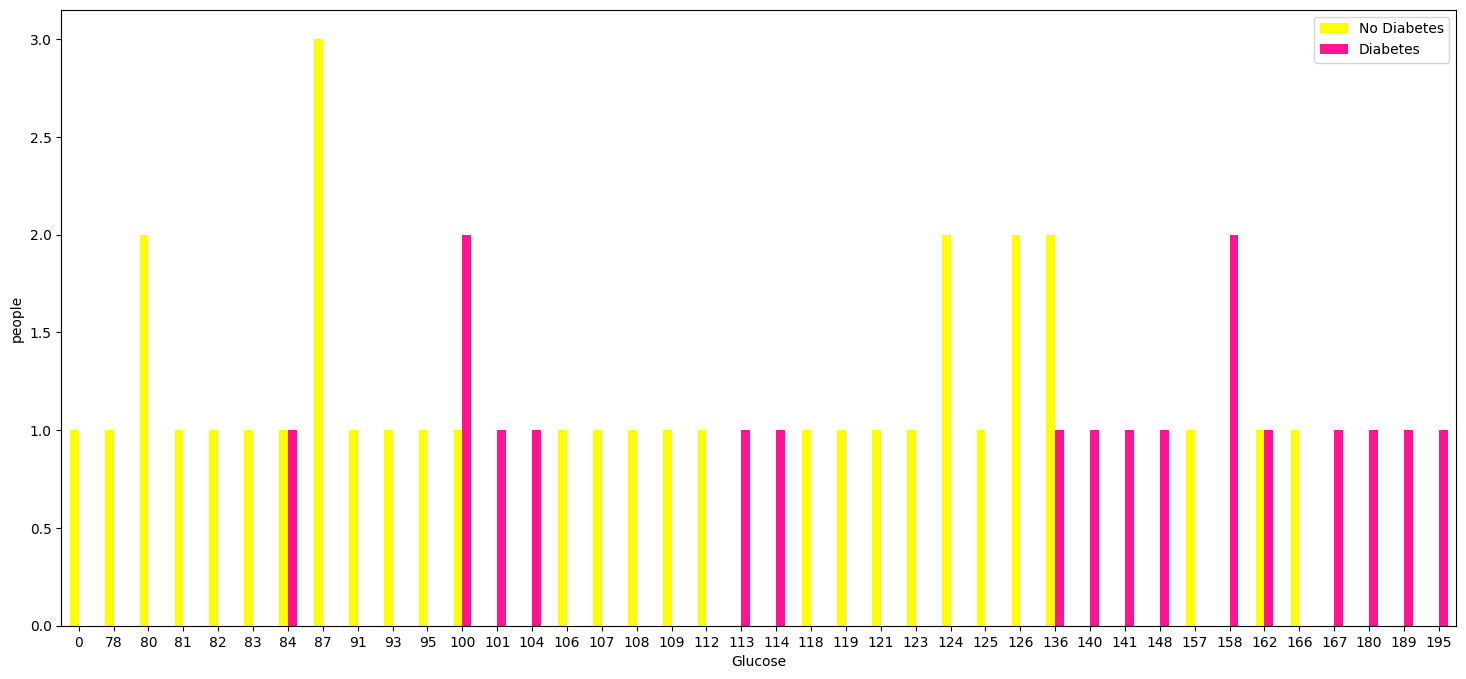

In [6]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar", figsize=(18,8), color=["yellow","deeppink"])
plt.ylabel("people")
plt.xticks(rotation=0)
plt.legend(['No Diabetes', 'Diabetes'])

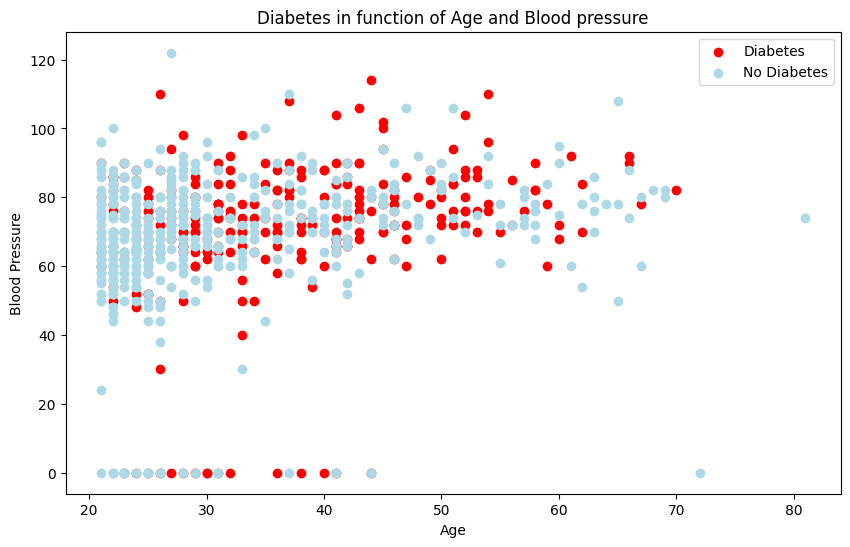

In [8]:
#find out Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))

#Scatter with positive example
plt.scatter(data.Age[data.Outcome==1], data.BloodPressure[data.Outcome==1], c="Red")

#Scatter with negative example
plt.scatter(data.Age[data.Outcome==0], data.BloodPressure[data.Outcome==0], c="lightblue")

#Add some helpful information
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"])

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

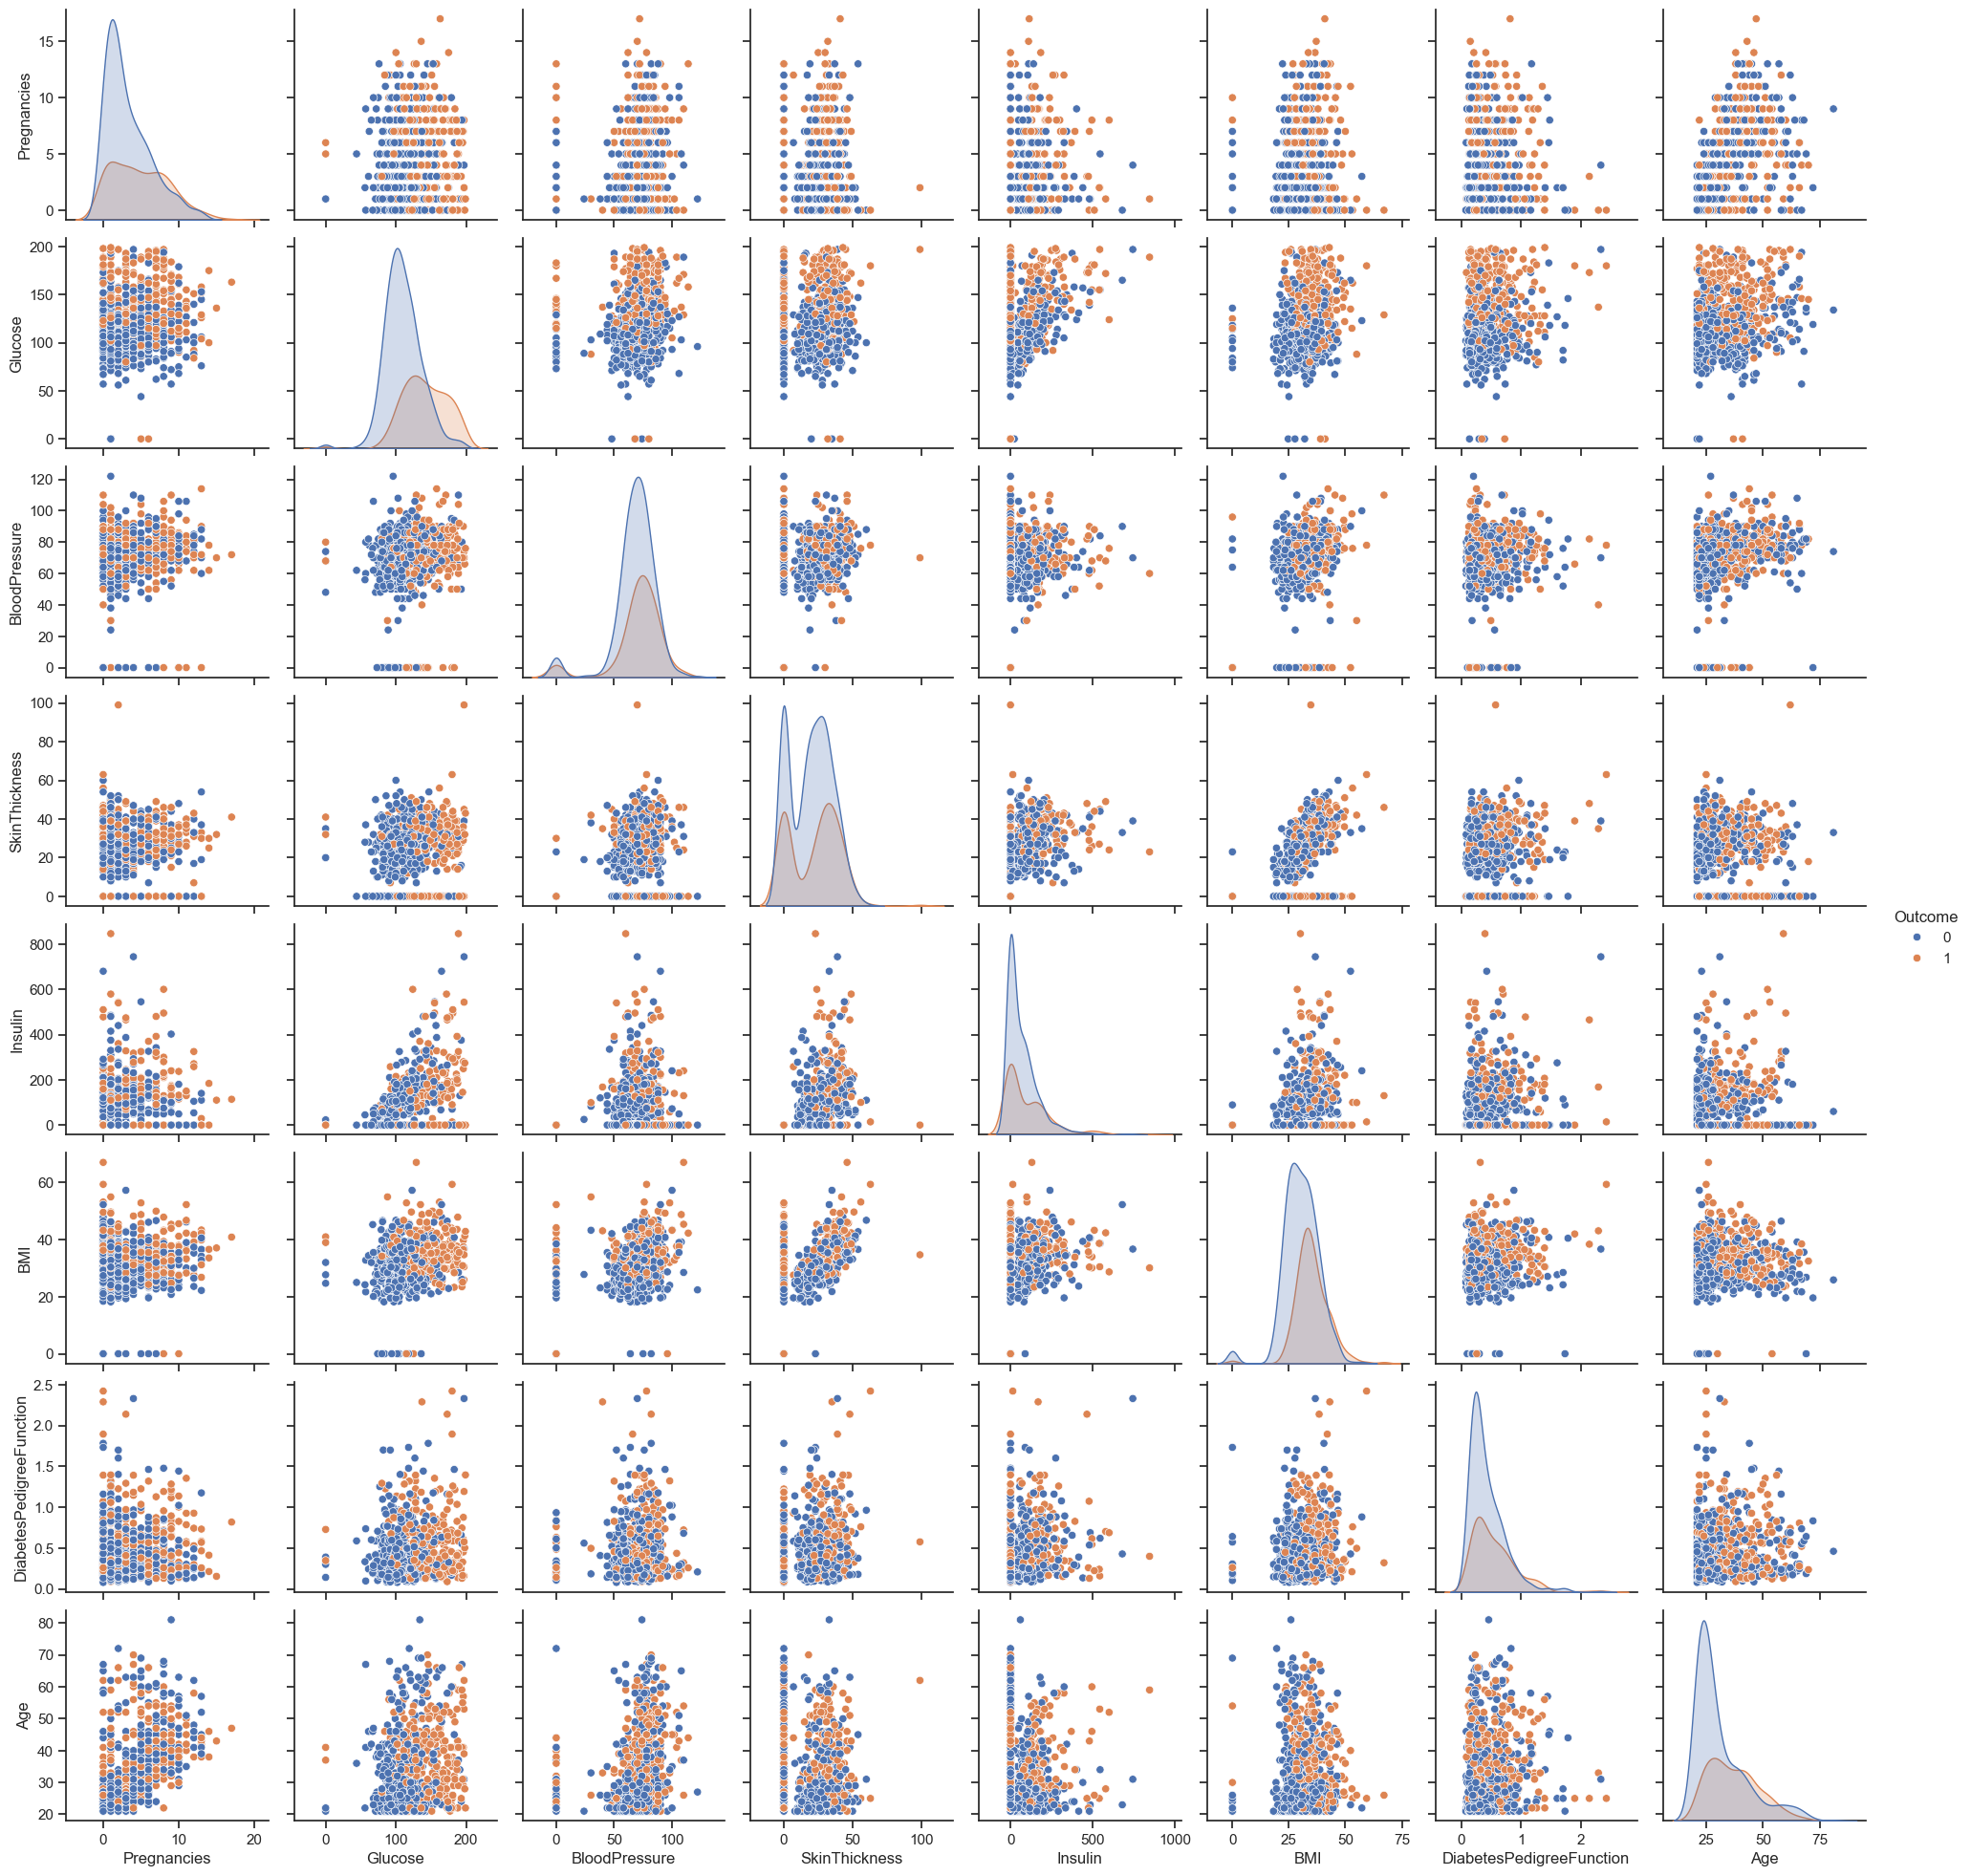

In [11]:
## Pairplotting of dataframe
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='Outcome')

(array([86., 75., 53., 26., 15.,  9.,  0.,  1.,  1.,  2.]),
 array([0.088 , 0.3212, 0.5544, 0.7876, 1.0208, 1.254 , 1.4872, 1.7204,
        1.9536, 2.1868, 2.42  ]),
 <BarContainer object of 10 artists>)

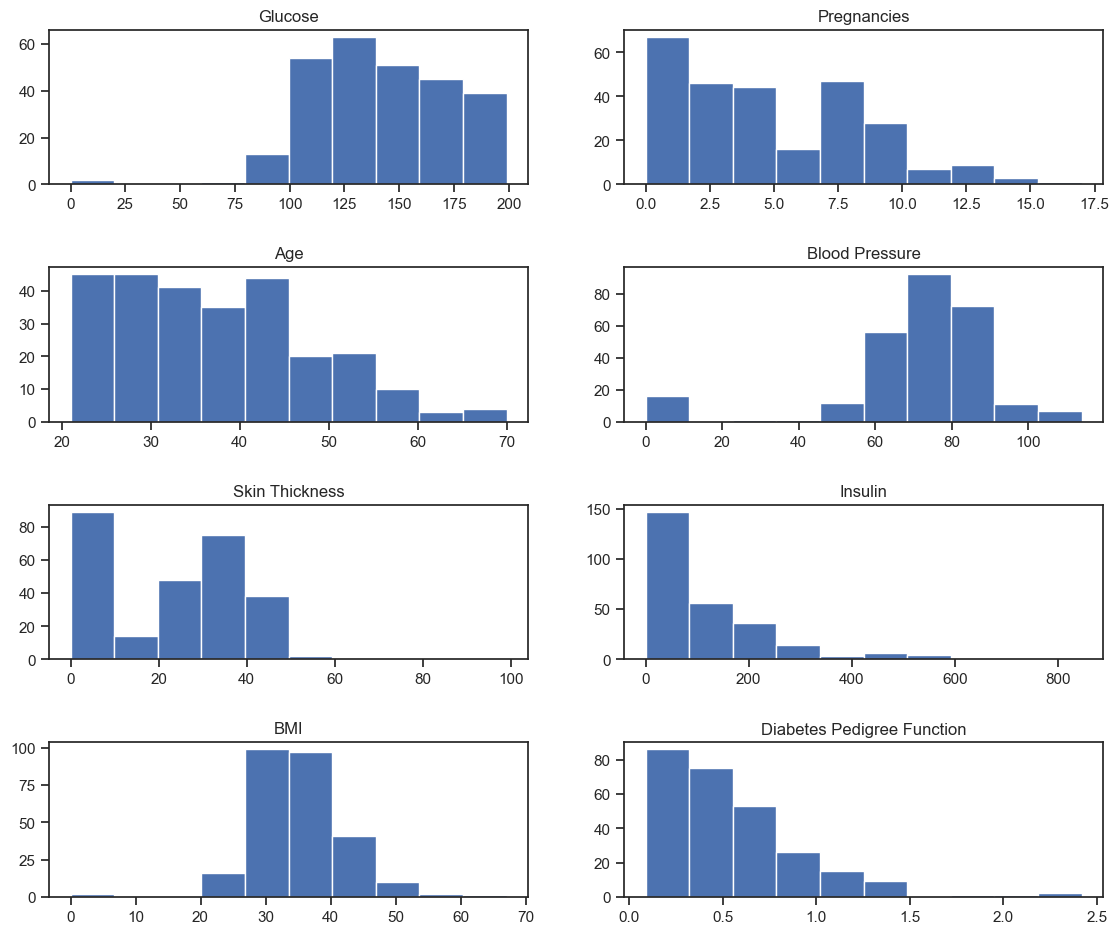

In [12]:
# Histogram of all coloumns when the Outcome is 1( has Diabetes)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1])
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1])
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1])
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1])
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1])
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1])
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1])
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1])

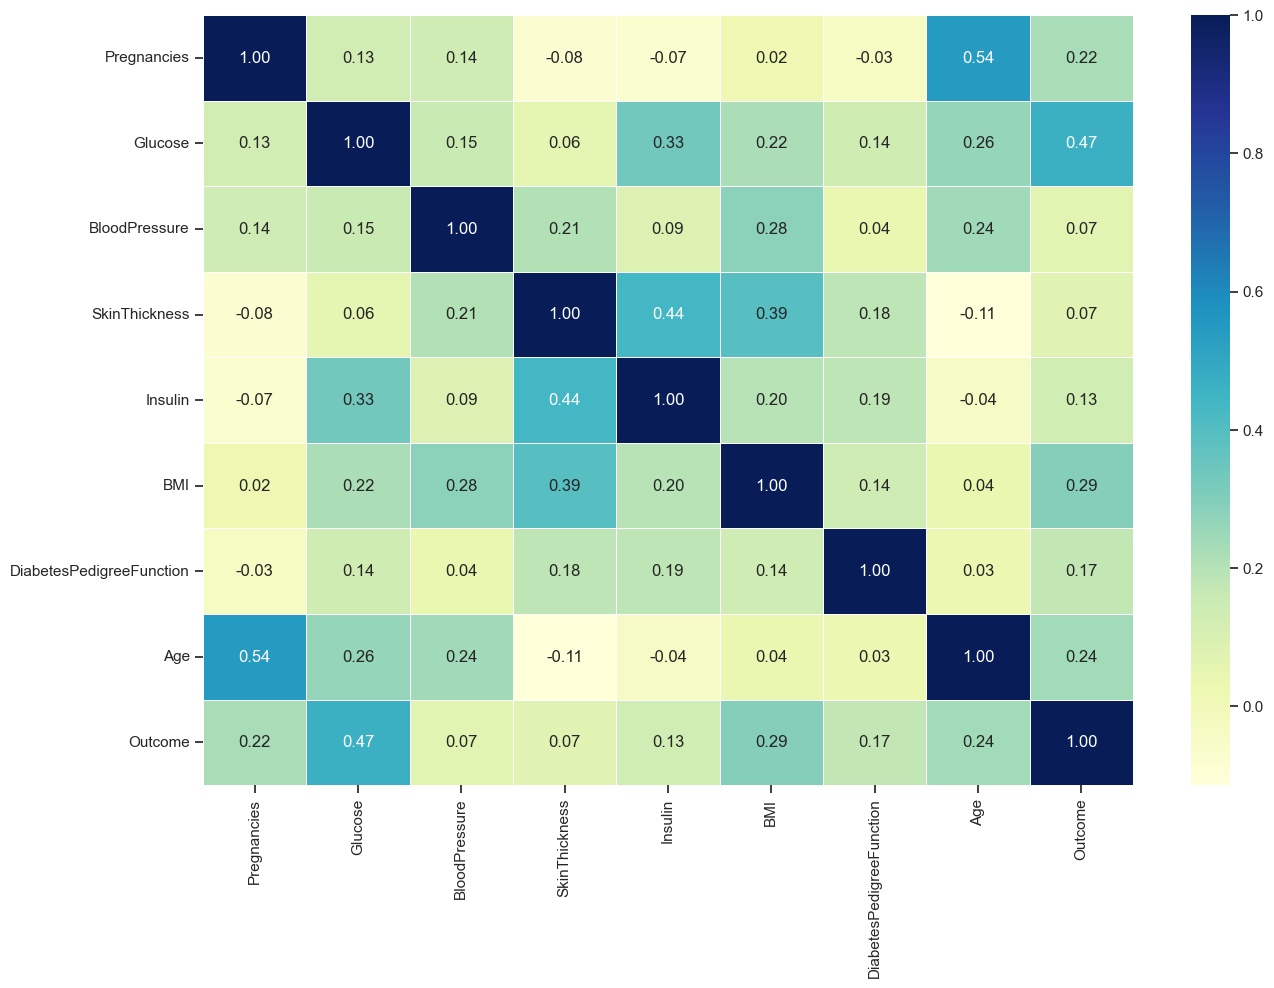

In [13]:
# correlation matrix between columns
## It shows the correlation(positive,neagative) between different columns(only integer value columns)

corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f", cmap="YlGnBu")

<b>Modeling and Training</b>

In [17]:
#random data shuffelin

data.sample(frac=1)

#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<b>We are going to train our model on 4 algorithms</b><br>
1.Logistic Regression<br>
2.KNN<br>
3.Random Forest Classifier<br>
4.Support Vector Machine<br>

In [22]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

## Build an model (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
## Evaluating the model
knn = knn.score(X_test,y_test)

## Build an model (Random forest classifier)
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(X_train,y_train)
## Evaluating the model
clf = clf.score(X_test,y_test)

## Build an model (Support Vector Machine)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
## Evaluating the model
svm = svm.score(X_test,y_test)

c:\Users\M.LAK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<b>Let’s visualize the training performance of all the models</b>

<Axes: >

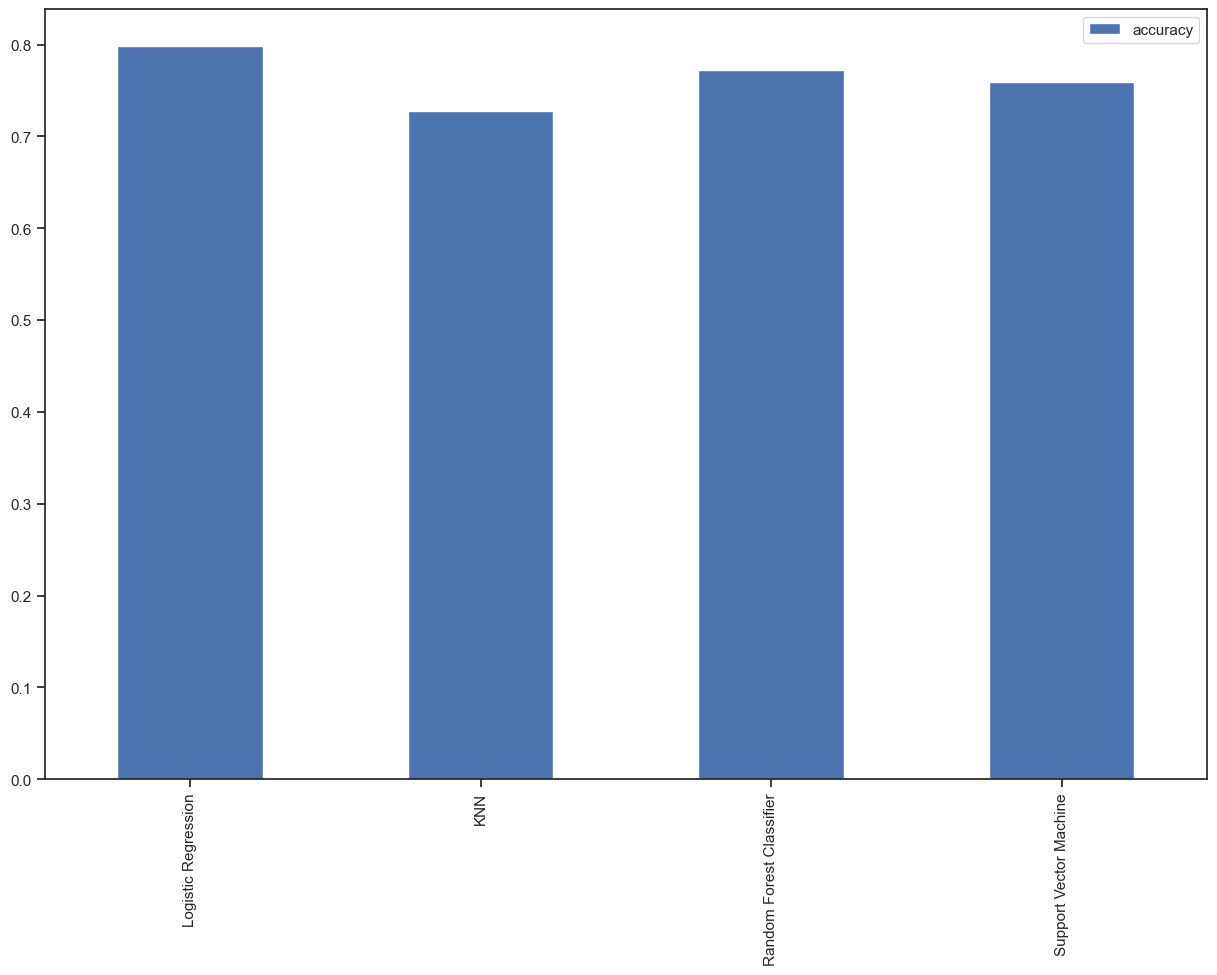

In [23]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
"KNN":knn,
"Random Forest Classifier":clf,
"Support Vector Machine":svm,},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10))

##############OUTPUT###############

         #Logistic Regression    KNN     Random ForestClassifier  SVM
#accuracy      0.818182        0.772727       0.798701       0.818182

<i>Here we can see both SVM and Logistic Regression are performing very well with an accuracy of 81%. we can improve the accuracy more using Hyperparameter tuning.<i>

<b>Improving accuracy using Hyperparameter tuning</b><br>
We are going to use both grid search cv and RandomizedSearchcv for our hyperparameter turning.<br>

In the logistic regression parameter which we can be easily hyper tuned are C and solver .

<b>Hyperparameter Tuning using RandomizedSearchcv</b>

In [27]:
# Create a hyperparameter grid for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}

# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
score = rs_log_reg.score(X_test,y_test)
print(score*100)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
79.87012987012987


Using Randomized Search cv we have increased the accuracy by 2%.

<b>Hyperparameter Tuning using GridSearchcv</b>

In [28]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {'C': np.logspace(-4,4,30),"solver":["liblinear"]}
#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
#fit grid search cv
gs_log_reg.fit(X_train,y_train)
score = gs_log_reg.score(X_test,y_test)
print(score*100)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
79.22077922077922


Using Grid Search CV we have increased the accuracy by up to 2.5%

<b>Best Model is logistic Regression with 79% accuracy</b>

<b>Evaluate the model</b>

In [29]:
#predict X_test first
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

<b>Confusion Matrix</b>

Text(32.25, 0.5, 'Predicted label')

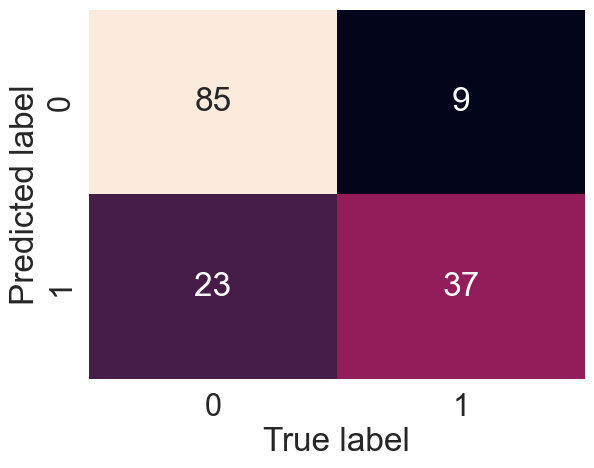

In [31]:
sns.set(font_scale=2)
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label")

<b>Accuracy Score</b>

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preds))

0.7922077922077922


<b>Classification Report</b>

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        94
           1       0.80      0.62      0.70        60

    accuracy                           0.79       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



<b>Save and Load the model</b>

In [42]:
import pickle
# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7922077922077922